# Food Demand Forecasting For Food Delivery Company Using IBM Cloud


## Data Pre-processing
Data Pre-processing includes the following main tasks

Import the Libraries.
Reading the dataset.
Exploratory Data Analysis
Checking for Null Values.
Reading and merging .csv files
Dropping the columns
Label Encoding
Data Visualization.
Splitting the Dataset into Dependent and Independent variable.
Splitting Data into Train and Test.

### Importing The Libraries

In [1]:
from pathlib import Path as pth
import pandas as pd
import numpy as np

### Reading The Dataset

In [2]:
train = pd.read_csv("C:\\Users\\VISWA TEJA\\Downloads\\train.csv")
test = pd.read_csv("C:\\Users\\VISWA TEJA\\Downloads\\test.csv")
meal_info = pd.read_csv("C:\\Users\\VISWA TEJA\\Downloads\\meal_info.csv")
center_info = pd.read_csv("C:\\Users\\VISWA TEJA\\Downloads\\fulfilment_center_info.csv")

### Exploratory Data Analysis

In [3]:
train.head() 

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [4]:
meal_info.head()

meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [5]:
center_info.head()

center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [8]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [9]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [10]:
train.describe()

id           week      center_id        meal_id  \
count  4.565480e+05  456548.000000  456548.000000  456548.000000   
mean   1.250096e+06      74.768771      82.105796    2024.337458   
std    1.443548e+05      41.524956      45.975046     547.420920   
min    1.000000e+06       1.000000      10.000000    1062.000000   
25%    1.124999e+06      39.000000      43.000000    1558.000000   
50%    1.250184e+06      76.000000      76.000000    1993.000000   
75%    1.375140e+06     111.000000     110.000000    2539.000000   
max    1.499999e+06     145.000000     186.000000    2956.000000   

       checkout_price     base_price  emailer_for_promotion  \
count   456548.000000  456548.000000          456548.000000   
mean       332.238933     354.156627               0.081152   
std        152.939723     160.715914               0.273069   
min          2.970000      55.350000               0.000000   
25%        228.950000     243.500000               0.000000   
50%        296.820000     310.460000               0.000000   
75%        445.230000     458.870000               0.000000   
max        866.270000     866.270000               1.000000   

       homepage_featured     num_orders  
count       456548.00000  456548.000000  
mean             0.10920     261.872760  
std              0.31189     395.922798  
min              0.00000      13.000000  
25%              0.00000      54.000000  
50%              0.00000     136.000000  
75%              0.00000     324.000000  
max              1.00000   24299.000000

### Checking For Null Values

In [11]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

### Reading And Merging .Csv Files

In [12]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")

In [13]:
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")
trainfinal.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1018704     2         55     1885          135.83      152.29   
2  1196273     3         55     1885          132.92      133.92   
3  1116527     4         55     1885          135.86      134.86   
4  1343872     5         55     1885          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders   category cuisine  \
0                      0                  0         177  Beverages    Thai   
1                      0                  0         323  Beverages    Thai   
2                      0                  0          96  Beverages    Thai   
3                      0                  0         163  Beverages    Thai   
4                      0                  0         215  Beverages    Thai   

   city_code  region_code center_type  op_area  
0        647           56      TYPE_C      2.0  
1        647           56      TYPE_C      2.0  
2        647           56      TYPE_C      2.0  
3        647           56      TYPE_C      2.0  
4        647           56      TYPE_C      2.0

In [14]:
trainfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

### Dropping Columns

In [15]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

id  week  checkout_price  base_price  emailer_for_promotion  \
0  1379560     1          136.83      152.29                      0   
1  1018704     2          135.83      152.29                      0   
2  1196273     3          132.92      133.92                      0   
3  1116527     4          135.86      134.86                      0   
4  1343872     5          146.50      147.50                      0   

   homepage_featured  num_orders   category cuisine  city_code  region_code  \
0                  0         177  Beverages    Thai        647           56   
1                  0         323  Beverages    Thai        647           56   
2                  0          96  Beverages    Thai        647           56   
3                  0         163  Beverages    Thai        647           56   
4                  0         215  Beverages    Thai        647           56   

  center_type  op_area  
0      TYPE_C      2.0  
1      TYPE_C      2.0  
2      TYPE_C      2.0  
3      TYPE_C      2.0  
4      TYPE_C      2.0

In [16]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [17]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [18]:
trainfinal = trainfinal[cols]
trainfinal.head()

id  week  city_code  region_code center_type  op_area   category  \
0  1379560     1        647           56      TYPE_C      2.0  Beverages   
1  1018704     2        647           56      TYPE_C      2.0  Beverages   
2  1196273     3        647           56      TYPE_C      2.0  Beverages   
3  1116527     4        647           56      TYPE_C      2.0  Beverages   
4  1343872     5        647           56      TYPE_C      2.0  Beverages   

  cuisine  checkout_price  base_price  emailer_for_promotion  \
0    Thai          136.83      152.29                      0   
1    Thai          135.83      152.29                      0   
2    Thai          132.92      133.92                      0   
3    Thai          135.86      134.86                      0   
4    Thai          146.50      147.50                      0   

   homepage_featured  num_orders  
0                  0         177  
1                  0         323  
2                  0          96  
3                  0         163  
4                  0         215

In [19]:
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

### Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])

trainfinal['category'] = lb1.fit_transform(trainfinal['category'])

trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])

In [21]:
trainfinal.head()

id  week  city_code  region_code  center_type  op_area  category  \
0  1379560     1        647           56            2      2.0         0   
1  1018704     2        647           56            2      2.0         0   
2  1196273     3        647           56            2      2.0         0   
3  1116527     4        647           56            2      2.0         0   
4  1343872     5        647           56            2      2.0         0   

   cuisine  checkout_price  base_price  emailer_for_promotion  \
0        3          136.83      152.29                      0   
1        3          135.83      152.29                      0   
2        3          132.92      133.92                      0   
3        3          135.86      134.86                      0   
4        3          146.50      147.50                      0   

   homepage_featured  num_orders  
0                  0         177  
1                  0         323  
2                  0          96  
3                  0         163  
4                  0         215

In [22]:

trainfinal.shape

(456548, 13)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

### Data Visualization

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 7))
sns.displot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

Text(0.5, 1.0, 'num_orders Distribution')

<Figure size 1200x700 with 0 Axes>

In [25]:

trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

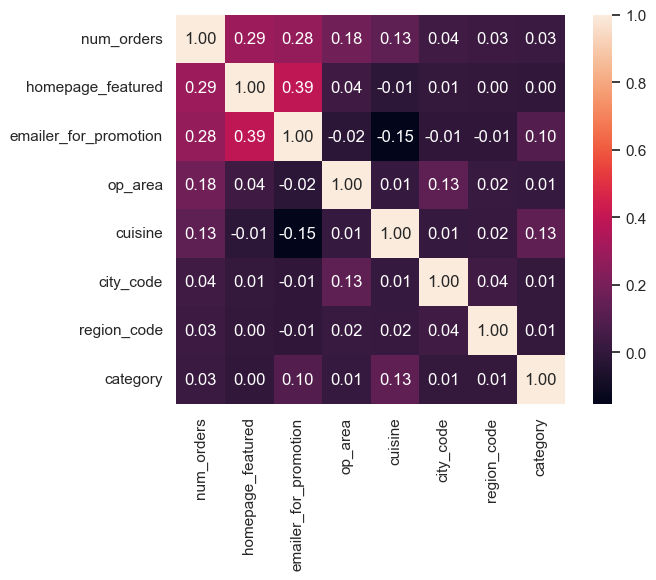

In [26]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale = 1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, 
                      fmt='.2f', yticklabels=columns.values, 
                      xticklabels=columns.values)
plt.show()

### Splitting The Dataset Into Dependent And Independent Variable

In [27]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X = trainfinal3.values
y = trainfinal['num_orders'].values

In [28]:
trainfinal3.head()

homepage_featured  emailer_for_promotion  op_area  cuisine  city_code  \
0                  0                      0      2.0        3        647   
1                  0                      0      2.0        3        647   
2                  0                      0      2.0        3        647   
3                  0                      0      2.0        3        647   
4                  0                      0      2.0        3        647   

   region_code  category  
0           56         0  
1           56         0  
2           56         0  
3           56         0  
4           56         0

### Split The Dataset Into Train Set And Test Set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

# Modeal building

### Train And Test Model Algorithms

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
from xgboost import XGBRegressor

### Model Evaluation

In [32]:
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 69.78440816461992


In [33]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.54200610127504


In [34]:
L = Lasso()
L.fit(X_train, y_train)
y_pred = L.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.01515366661607


In [35]:
EN = ElasticNet()
EN.fit(X_train, y_train)
y_pred = EN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 130.65126956268855


In [36]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.6561566612946


In [37]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 66.81661313332204


In [38]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 98.54676491647353


### Save The Model

In [39]:
import pickle
pickle.dump(DT, open('fdemand.pkl','wb'))

### Predicting The Output Using The Model

In [40]:
testfinal = pd.merge(test, meal_info, on="meal_id", how="outer")
testfinal = pd.merge(testfinal, center_info, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)

tcols = testfinal.columns.tolist()
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]

lb1 = LabelEncoder()
testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])
testfinal['category'] = lb1.fit_transform(testfinal['category'])
testfinal['cuisine'] = lb1.fit_transform(testfinal['cuisine'])

X_test = testfinal[features].values

In [41]:
testfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type                int32
op_area                  float64
category                   int32
cuisine                    int32
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
dtype: object

In [42]:

pred = DT.predict(X_test)
pred[pred<0] = 0
submit = pd.DataFrame({
    'id' : testfinal['id'],
    'num_orders' : pred
})

In [43]:
submit.to_csv("submission.csv", index=False)

In [44]:
submit.describe()

id    num_orders
count  3.257300e+04  32573.000000
mean   1.248476e+06    262.282937
std    1.441580e+05    360.532945
min    1.000085e+06     15.258065
25%    1.123969e+06     64.273764
50%    1.247296e+06    147.391892
75%    1.372971e+06    321.116197
max    1.499996e+06   5604.684211